In [54]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import requests
import time 
from multiprocessing import Process, Queue, Pool
import threading
import sys
import numpy as np
import re
from random_user_agent.params import SoftwareName, OperatingSystem
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
import pandasql as ps
from IPython.display import display,HTML
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt

#FUNCION DEL SCRAPPER DE LA PAGINA OFICAL DE PALACIO DE HIERRO
def scrapper_palacio(producto):
    
    #path es una variable con la que asignamos la localización del chromerdriver en nuestro equipo
    #driver es la variable que manda a llamar chromedriver
    path = "D:\\Universidad\\3° Semestre\\MDD\\ProyectoFinal(Webscarpper)\\chromedriver.exe"
    driver = webdriver.Chrome(path)
    
    #Funcion para pausar la computadora durante cierto tiempo
    time.sleep(5)
    
    #url de la pagina
    url = "https://www.elpalaciodehierro.com/buscar?q="+producto+"."
    driver.get(url)
    time.sleep(10)
    
    #variable para guardar los productos de la pagina
    items = driver.find_elements_by_class_name("b-product")
    
    #aquí se extraen los datos de las marcas y se guardan en una lista 
    lista_marcas = []
    for item in items:
        try:
            lista_marcas.append(item.find_element_by_class_name("b-product_tile-brand").text)
        except:
            lista_marcas.append(np.nan)
    
    #aquí se extraen los datos de las nombres y se guardan en una lista 
    lista_nombres = []
    for item in items:
        try:
            lista_nombres.append(item.find_element_by_class_name("b-product_tile-name").text)
        except:
            lista_nombres.append(np.nan)
    
    #aquí se extraen los datos de los precios y se guardan en una lista         
    lista_precio = []
    for item in items:
        try:
            lista_precio.append(item.find_element_by_class_name("b-product_price").text.split("\n")[0])
        except:
            lista_precio.append(np.nan)
    
    #aquí se extraen los datos de los precios promocion y se guardan en una lista 
    lista_precioprom = []
    for item in items:
        try:
            lista_precioprom.append(item.find_element_by_class_name("b-product_price").text.split("\n")[1])
        except:
            lista_precioprom.append(np.nan)
            
    time.sleep(10)
    today = date.today()
    
    #se crea un dataframe con lass listas
    df_palacio = pd.DataFrame(columns=["FECHA","AUTOSERVICIO","MARCA","NOMBRE","PRECIO","PROMOCION"])
    df_palacio["MARCA"] = lista_marcas
    df_palacio["NOMBRE"] = lista_nombres
    df_palacio["PRECIO"] = lista_precio
    df_palacio["PROMOCION"] = lista_precioprom
    df_palacio["AUTOSERVICIO"] ="PALACIO DE HIERRO"
    df_palacio["FECHA"] = str(today)
    
    #se remplazan algunos strings y caracteres especiales
    df_palacio["PROMOCION"]=df_palacio["PROMOCION"].str.replace("Precio en bundle","")
    df_palacio["PRECIO"]=df_palacio["PRECIO"].str.replace("Precio regular","")
    df_palacio["PRECIO"]=df_palacio["PRECIO"].str.strip()
    df_palacio["PRECIO"] = df_palacio["PRECIO"].str.replace("$","")
    df_palacio["PRECIO"] = df_palacio["PRECIO"].str.replace(",","")
    df_palacio["PRECIO"] = df_palacio["PRECIO"].astype(float)
    
    df_palacio["PROMOCION"]=df_palacio["PROMOCION"].str.replace("Precio en bundle","")
    df_palacio["PROMOCION"]=df_palacio["PROMOCION"].str.strip()
    df_palacio["PROMOCION"] = df_palacio["PROMOCION"].str.replace("$","")
    df_palacio["PROMOCION"] = df_palacio["PROMOCION"].str.replace(",","")
    df_palacio["PROMOCION"] = df_palacio["PROMOCION"].astype(float)
    
    time.sleep(10)
    #se cierra el driver
    driver.quit()
    
    return df_palacio



#FUNCION DEL SCRAPPER DE LA PAGINA OFICAL DE WALMART MEXICO
def scrapper_walmart(producto):
    
    path = "D:\\Universidad\\3° Semestre\\MDD\\ProyectoFinal(Webscarpper)\\chromedriver.exe" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver = webdriver.Chrome(path)
    
    time.sleep(5)
    url = "https://www.walmart.com.mx/productos?Ntt="+producto+""
    driver.get(url)
    time.sleep(10)
    
    producto = driver.find_elements_by_class_name("product_container__3DSm4") 
    
    lista_nombre=[]
    for i in range(0,len(producto)):
        try:
            lista_nombre.append(producto[i].find_elements_by_class_name("ellipsis")[0].text)
        except:
            lista_nombre.append(np.nan)
    
    lista_marca=[]
    for i in range(0,len(producto)):
        try:
            lista_marca.append(producto[i].find_elements_by_class_name("product_link__1SPaP.text_text__3oq-D")[0].text)
        except:
            lista_marca.append(np.nan)
            
    lista_precios=[]
    for i in range(0,len(producto)):
        try:
            lista_precios.append(producto[i].find_elements_by_class_name("text_text__3oq-D.text_large__K4EIS.text_bold__2Ptj-")[0].text)
        except:
            lista_precios.append(np.nan)
            
    lista_precioprom=[]
    for i in range(0,len(producto)):
        try:
            lista_precioprom.append(producto[i].find_elements_by_class_name("product_strike__9Pjv1")[0].text)
        except:
            lista_precioprom.append(np.nan)
            
    today = date.today()
    
    
    df_Wal =pd.DataFrame(columns=["FECHA","AUTOSERVICIO","MARCA","NOMBRE", "PRECIO", "PROMOCION"])

    df_Wal["NOMBRE"] = lista_nombre
    df_Wal["MARCA"] = lista_marca
    df_Wal["PRECIO"] = lista_precios
    df_Wal["PROMOCION"] = lista_precioprom
    df_Wal["AUTOSERVICIO"] = "WALMART"
    df_Wal["FECHA"] = str(today)
    
    df_Wal.PRECIO = df_Wal.PRECIO.astype(str)
    df_Wal.PRECIO = df_Wal.PRECIO.str.strip()
    df_Wal.PRECIO = df_Wal.PRECIO.str.replace(",","")
    df_Wal.PRECIO = df_Wal.PRECIO.str.replace("$","")
    df_Wal.PRECIO = df_Wal.PRECIO.str.replace("--","")
    df_Wal.PRECIO = df_Wal.PRECIO.str.replace("''","")
    df_Wal.PRECIO = df_Wal.PRECIO.astype(float)

    df_Wal.PROMOCION = df_Wal.PROMOCION.astype(str)
    df_Wal.PROMOCION = df_Wal.PROMOCION.str.strip()
    df_Wal.PROMOCION = df_Wal.PROMOCION.str.replace(",","")
    df_Wal.PROMOCION = df_Wal.PROMOCION.str.replace("$","")
    df_Wal.PROMOCION = df_Wal.PROMOCION.str.replace("--","")
    df_Wal.PROMOCION = df_Wal.PROMOCION.str.replace("''","")
    df_Wal.PROMOCION = df_Wal.PROMOCION.astype(float)

    df_Wal.MARCA = df_Wal.MARCA.astype(str)
    df_Wal.MARCA = df_Wal.MARCA.str.upper()
    
    
    time.sleep(10)
    driver.quit()
    
    return df_Wal


#FUNCION DEL SCRAPPER DE LA PAGINA OFICAL DE SORIANA MEXICO
def scrapper_soriana(producto):


    path = "D:\\Universidad\\3° Semestre\\MDD\\ProyectoFinal(Webscarpper)\\chromedriver.exe" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver= webdriver.Chrome(path)
    time.sleep(5)

    url = "https://www.soriana.com/buscar?q="+producto+"&cid=&search-button="
    driver.get(url)
    time.sleep(10)

    items = driver.find_elements_by_class_name("col-4.col-sm-3.col-md-2-4,product-tile--wrapper.d-flex.list-item-product")

    lista_marcas = []
    for item in items:
        try:
            lista_marcas.append(item.find_element_by_class_name("product-tile--brand-link.ellipsis-brand-name").text)
        except:
            lista_marcas.append(np.nan)
        
    lista_nombres = []
    for item in items:
        try:
            lista_nombres.append(item.find_element_by_class_name("pdp-link.product-tile--name").text)
        except:
            lista_nombres.append(np.nan)
        
    lista_precio = []
    for item in items:
        try:
            lista_precio.append(item.find_element_by_class_name("price.product-tile--price.p-0.border-x-1.pb-1").text.split("\n")[0])
        except:
            lista_precio.append(np.nan)
    
    lista_precioprom = []
    for item in items:
        try:
            lista_precioprom.append(item.find_element_by_class_name("mr-0.font-primary--bold.font-size-14.font-primary--regular.text-right.null.px-1.cart-price.price-plp.price-not-found.price-pdp").text.split("\n")[1])
        except:
            lista_precioprom.append(np.nan)
        
    time.sleep(10)
    today = date.today()

    df_soriana = pd.DataFrame(columns=["FECHA","AUTOSERVICIO","MARCA","NOMBRE","PRECIO","PROMOCION"])
    df_soriana["MARCA"] = lista_marcas
    df_soriana["NOMBRE"] = lista_nombres
    df_soriana["PRECIO"] = lista_precio
    df_soriana["PROMOCION"] = lista_precioprom
    df_soriana["AUTOSERVICIO"] ="SORIANA"
    df_soriana["FECHA"] = str(today)

    df_soriana.PRECIO = df_soriana.PRECIO.astype(str).str.replace(",","")
    df_soriana.PRECIO = df_soriana.PRECIO.str.replace("$","")
    df_soriana.PRECIO = df_soriana.PRECIO.astype(float)

    df_soriana.PROMOCION = df_soriana.PROMOCION.astype(str).str.replace(",","")
    df_soriana.PROMOCION = df_soriana.PROMOCION.str.replace("$","")
    df_soriana.PROMOCION = df_soriana.PROMOCION.astype(float)
    
    df_soriana.MARCA = df_soriana.MARCA.str.upper()

    time.sleep(10)
    driver.quit()

    return df_soriana







In [55]:
df_palaciohierro = pd.DataFrame()
for i in ["relojes","televisiones","consolas"]:
    aux = scrapper_palacio(i)
    df_palaciohierro = pd.concat([df_palaciohierro,aux])


df_Walmart = pd.DataFrame()
for i in ["relojes","televisiones","consolas"]:
    aux = scrapper_walmart(i)
    df_Walmart = pd.concat([df_Walmart,aux])
    

df_soriana = pd.DataFrame()
for i in ["relojes","televisiones","consolas"]:
    aux = scrapper_soriana(i)
    df_soriana = pd.concat([df_soriana,aux])
    
    
    
df_palaciohierro.reset_index(drop=True, inplace=True)
df_Walmart.reset_index(drop=True, inplace=True)
df_soriana.reset_index(drop=True, inplace=True)

    
df_final = pd.DataFrame()
df_final = pd.concat([df_soriana,df_Walmart,df_palaciohierro])
df_final.reset_index(drop=True, inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_12412\2668281075.py:81: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_palacio["PRECIO"] = df_palacio["PRECIO"].str.replace("$","")
C:\Users\marco\AppData\Local\Temp\ipykernel_12412\2668281075.py:87: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_palacio["PROMOCION"] = df_palacio["PROMOCION"].str.replace("$","")
C:\Users\marco\AppData\Local\Temp\ipykernel_12412\2668281075.py:81: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_palacio["PRECIO"] = df_palacio["PRECIO"].str.re

In [56]:
#df_final

,FECHA,AUTOSERVICIO,MARCA,NOMBRE,PRECIO,PROMOCION
0,2022-12-17,SORIANA,LORUS,Reloj de Pulso para Caballero LORUS RH967JX9 A...,1828.0,NaN
1,2022-12-17,SORIANA,LORUS,Reloj de Pulso Unisex LORUS R2321MX9 Negro,1267.0,NaN
2,2022-12-17,SORIANA,LORUS,Reloj de Pulso para Dama LORUS RG234PX9 Dorado,1894.0,NaN
3,2022-12-17,SORIANA,LORUS,Reloj de Pulso para Caballero LORUS RT306HX9 D...,3162.0,NaN
4,2022-12-17,SORIANA,LORUS,Reloj de Pulso para Caballero LORUS RH921KX9 A...,2121.0,NaN
...,...,...,...,...,...,...
289,2022-12-17,PALACIO DE HIERRO,PLAYSTATION,Rainbow Six Extraction PS5,999.0,NaN
290,2022-12-17,PALACIO DE HIERRO,THE MAAD COLLECTION,Buffet Beverly en madera,69990.0,62991.0
291,2022-12-17,PALACIO DE HIERRO,GANDHI,Buffettología,329.0,NaN
292,2022-12-17,PALACIO DE HIERRO,PLAYSTATION,Far Cry 6 Limited Edition PS5,1499.0,NaN


In [71]:
#Algunas de las marcas de relojes, televisiones y consolas de videojuegos que ofrece palacio de hierro
ps.sqldf("select distinct MARCA from df_final where AUTOSERVICIO like '%PALACIO DE HIERRO%'")

,MARCA
0,NAUTICA
1,TOMMY HILFIGER
2,DKNY
3,TORY BURCH
4,MICHAEL KORS
5,SAMSUNG
6,TOUS
7,SONOS
8,LG
9,EPSILON


In [73]:
#Algunos relojes, consolas y televisiones de walmart ordenados del precio más alto al precio más bajos
ps.sqldf("select * from df_final where AUTOSERVICIO like'%WALMART%' order by PRECIO desc ")

,FECHA,AUTOSERVICIO,MARCA,NOMBRE,PRECIO,PROMOCION
0,2022-12-17,WALMART,ONN,"Television 70"" Class 4K (2160p) Pantalla Smar...",17989.00,NaN
1,2022-12-17,WALMART,ONN,"Television 70"" Class 4K (2160p) Pantalla Smar...",16999.00,NaN
2,2022-12-17,WALMART,SONY,TV Sony 65 Pulgadas 4K Ultra HD Smart TV LED ...,14999.00,19999.0
3,2022-12-17,WALMART,BULOVA,Reloj Bulova Precisionist Crono Caballero Bul...,13878.00,NaN
4,2022-12-17,WALMART,TCL,TV TCL 65 Pulgadas 4K Ultra HD Smart TV LED 6...,11999.00,16499.0
...,...,...,...,...,...,...
92,2022-12-17,WALMART,CASIO,Reloj Casio Core Digital Caballero F-91WM-3AC...,509.00,NaN
93,2022-12-17,WALMART,CASIO,Reloj Casio Vintage Digital A168WA1-VT Casio ...,499.00,NaN
94,2022-12-17,WALMART,FUNKO,Televisión POP: Letterkenny- Katy con puppers...,443.00,NaN
95,2022-12-17,WALMART,YOTIJAR,Decoración de habitación muebles de televisi...,157.77,NaN


In [81]:
#Algunos productos de soriana en donde su precio se mayor que $30000
ps.sqldf("select * from df_final where PRECIO > 30000 and AUTOSERVICIO like '%SORIANA%' ")

,FECHA,AUTOSERVICIO,MARCA,NOMBRE,PRECIO,PROMOCION
0,2022-12-17,SORIANA,SAMSUNG,Pantalla Samsung 85 Pulg 4K UHD UN85AU8000FXZX,49990.0,None
1,2022-12-17,SORIANA,SAMSUNG,Pantalla Samsung 85 Pulg 4K QLED QN85Q60BAFXZX,52990.0,None
2,2022-12-17,SORIANA,SAMSUNG,Pantalla Samsung 55 Pulg 4K QLED Smart TV QN55...,30990.0,None


In [82]:
#Algunos productos de Walmart en donde exista una promoción en el precio ordenados del mayor al menor 
ps.sqldf("select * from df_final where AUTOSERVICIO like'%WALMART%' and PROMOCION > 1 order by PROMOCION desc ")

,FECHA,AUTOSERVICIO,MARCA,NOMBRE,PRECIO,PROMOCION
0,2022-12-17,WALMART,SONY,TV Sony 65 Pulgadas 4K Ultra HD Smart TV LED ...,14999.0,19999.0
1,2022-12-17,WALMART,TCL,TV TCL 65 Pulgadas 4K Ultra HD Smart TV LED 6...,11999.0,16499.0
2,2022-12-17,WALMART,SAMSUNG,TV Samsung 50 Pulgadas 4K Ultra HD Smart TV L...,8999.0,13499.0
3,2022-12-17,WALMART,SAMSUNG,TV Samsung 50 Pulgadas 4K Ultra HD Smart TV L...,7999.0,11999.0
4,2022-12-17,WALMART,HISENSE,TV Hisense 55 Pulgadas 4K Ultra HD Smart TV L...,7999.0,11999.0
5,2022-12-17,WALMART,PHILIPS,TV Philips 55 Pulgadas 4K Ultra HD Smart TV L...,7999.0,11999.0
6,2022-12-17,WALMART,LG,TV LG 50 Pulgadas UHD 4K TV AI ThinQ SMART TV...,7999.0,11999.0
7,2022-12-17,WALMART,HISENSE,TV Hisense 50 Pulgadas 4K Ultra HD Smart TV U...,7999.0,11999.0
8,2022-12-17,WALMART,HISENSE,TV Hisense 50 Pulgadas 4K Ultra HD Smart TV L...,7699.0,11799.0
9,2022-12-17,WALMART,TCL,TV TCL 50 Pulgadas 4K Ultra HD Smart TV QLED ...,8499.0,11299.0


In [90]:
#Algunos productos de Palacio de Hierro ordenados del precio promocion mas pequeño al más grande en donde el precio promocion no sea mayor que $10000
ps.sqldf("select * from df_final where AUTOSERVICIO like'%PALACIO DE HIERRO%' and PROMOCION < 10000 order by PROMOCION asc")

,FECHA,AUTOSERVICIO,MARCA,NOMBRE,PRECIO,PROMOCION
0,2022-12-17,PALACIO DE HIERRO,EPSILON,"Playera ""Televisora"" Hombre",629.0,440.30
1,2022-12-17,PALACIO DE HIERRO,TOMMY HILFIGER,Cinturón en textil Negro Hombre,1589.0,953.40
2,2022-12-17,PALACIO DE HIERRO,RAZER,Audífonos Gaming para Consola Kraken X,1199.0,1079.10
3,2022-12-17,PALACIO DE HIERRO,PROMOUNTS,Soporte Inclinable 42 a 80 TV,1899.0,1538.19
4,2022-12-17,PALACIO DE HIERRO,MICHAEL KORS,Collar en Plata .925 Custom Kors con zirconia ...,2899.0,2029.30
5,2022-12-17,PALACIO DE HIERRO,RAZER,Audífonos Gaming para Consola Kraken,2299.0,2069.10
6,2022-12-17,PALACIO DE HIERRO,TOMMY HILFIGER,"Reloj para Hombre Hendrix Casual, Negro",3449.0,2069.40
7,2022-12-17,PALACIO DE HIERRO,MICHAEL KORS,Anillo en plata .925 MK Statement Link Mujer,2899.0,2319.20
8,2022-12-17,PALACIO DE HIERRO,PROMOUNTS,"Soporte de Brazo para TV Grande OMA6402 37 a 80""",2899.0,2348.19
9,2022-12-17,PALACIO DE HIERRO,MICHAEL KORS,Collar con dije en plata Premium Mujer,3499.0,2449.30


In [92]:
#Creacion e un dataframe con consultas sql para obtener el precio promedio de la marca samsung 
samprom_wal = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO  from df_final where MARCA like'%SAMSUNG%' and AUTOSERVICIO like'%WALMART%'")
samprom_pal = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO   from df_final where MARCA like'%SAMSUNG%' and AUTOSERVICIO like'%SORIANA%'")
samprom_sor = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO   from df_final where MARCA like'%SAMSUNG%' and AUTOSERVICIO like'%PALACIO DE HIERRO%'")

promedio_samsung = pd.concat([samprom_wal,samprom_pal,samprom_sor])
promedio_samsung.reset_index(drop=True, inplace=True)
promedio_samsung.to_excel("promedio_samsung.xlsx", index=False)
promedio_samsung

,MARCA,PRECIO PROMEDIO,AUTOSERVICIO
0,SAMSUNG,7499.000000,WALMART
1,SAMSUNG,26253.545455,SORIANA
2,SAMSUNG,40872.500000,PALACIO DE HIERRO


<AxesSubplot:title={'center':'Promedio de precios por página de la marca SAMSUNG'}, xlabel='AUTOSERVICIO'>

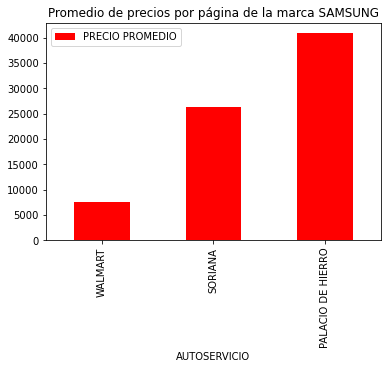

In [103]:
promedio_samsung.plot(x="AUTOSERVICIO", y="PRECIO PROMEDIO", kind="bar", stacked=False, title="Promedio de precios por página de la marca SAMSUNG", color="red")


In [106]:
#Creacion e un dataframe con consultas sql para obtener el precio promedio de la marca lg
lgprom_wal = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO  from df_final where MARCA like'%LG%' and AUTOSERVICIO like'%WALMART%'")
lgprom_pal = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO   from df_final where MARCA like'%LG%' and AUTOSERVICIO like'%SORIANA%'")
lgprom_sor = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO   from df_final where MARCA like'%LG%' and AUTOSERVICIO like'%PALACIO DE HIERRO%'")

promedio_lg = pd.concat([lgprom_wal,lgprom_pal,lgprom_sor])
promedio_lg.reset_index(drop=True, inplace=True)
promedio_lg.to_excel("promedio_lg.xlsx", index=False)
promedio_lg

,MARCA,PRECIO PROMEDIO,AUTOSERVICIO
0,LG,7999.000000,WALMART
1,LG,20990.000000,SORIANA
2,LG,65684.294118,PALACIO DE HIERRO


<AxesSubplot:title={'center':'Promedio de precios por página de la marca LG'}, xlabel='AUTOSERVICIO'>

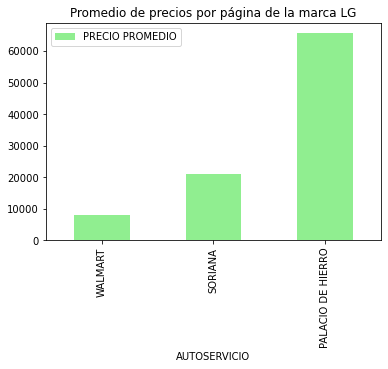

In [107]:
promedio_lg.plot(x="AUTOSERVICIO", y="PRECIO PROMEDIO", kind="bar", stacked=False, title="Promedio de precios por página de la marca LG", color="lightgreen")


In [115]:
#Creacion e un dataframe con consultas sql para obtener el precio promedio de la marca tcl
tclprom_wal = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO  from df_final where MARCA like'%TCL%' and AUTOSERVICIO like'%WALMART%'")
tclprom_pal = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO   from df_final where MARCA like'%TCL%' and AUTOSERVICIO like'%SORIANA%'")
tclprom_sor = ps.sqldf("select MARCA,avg(PRECIO) as 'PRECIO PROMEDIO',AUTOSERVICIO   from df_final where MARCA like'%TCL%' and AUTOSERVICIO like'%PALACIO DE HIERRO%'")

promedio_tcl = pd.concat([tclprom_wal,tclprom_pal,tclprom_sor])
promedio_tcl.reset_index(drop=True, inplace=True)
promedio_tcl.to_excel("promedio_tcl.xlsx", index=False)
promedio_tcl

,MARCA,PRECIO PROMEDIO,AUTOSERVICIO
0,TCL,9159.000000,WALMART
1,TCL,16990.000000,SORIANA
2,TCL,30736.666667,PALACIO DE HIERRO


<AxesSubplot:title={'center':'Promedio de precios por página de la marca TCL'}, xlabel='AUTOSERVICIO'>

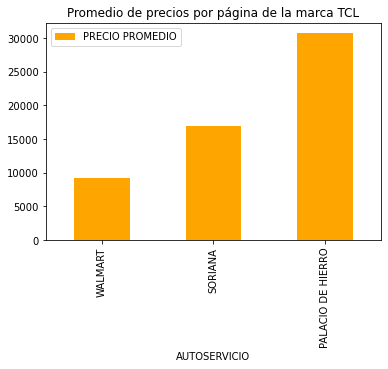

In [118]:
promedio_tcl.plot(x="AUTOSERVICIO", y="PRECIO PROMEDIO", kind="bar", stacked=False, title="Promedio de precios por página de la marca TCL", color="orange")


In [119]:
#ps.sqldf("select distinct MARCA from df_final where AUTOSERVICIO like'%WALMART%'")

In [120]:
#ps.sqldf("select distinct MARCA from df_final where AUTOSERVICIO like'%PALACIO DE HIERRO%'")

In [121]:
#ps.sqldf("select distinct MARCA from df_final where AUTOSERVICIO like'%SORIANA%'")